# Przygotowanie danych

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import iplot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from IPython.display import display
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
df1 = pd.read_csv('/content/drive/MyDrive/df1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/df2.csv')

In [64]:
categorical_columns1 = ['MaritalStatus', 'BusinessTravel', 'Department', 'EducationField', 'JobRole']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_columns1)
    ],
    remainder='passthrough')

X_transformed1 = preprocessor.fit_transform(df1)

df_transformed1 = pd.DataFrame(X_transformed1, columns=preprocessor.get_feature_names_out())

df_transformed1 = pd.concat([df_transformed1, df1], axis=1)


In [65]:
#typy df1


# BusinessTravel_dict = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
# df1['BusinessTravel']=df1['BusinessTravel'].map(BusinessTravel_dict)
Gender_dict = {'Male':0, 'Female':1}
df_transformed1['Gender']=df_transformed1['Gender'].map(Gender_dict)
# Department_dict = {'Research & Development':0, 'Human Resources':1, 'Sales':2}
# df1['Department']=df1['Department'].map(Department_dict)
# EducationField_dict = {'Life Sciences':0, 'Medical':1, 'Other':2, 'Technical Degree':3, 'Marketing':4, 'Human Resources':5}
# df1['EducationField']=df1['EducationField'].map(EducationField_dict)
# JobRole_dict = {'Laboratory Technician':0, 'Manufacturing Director':1, 'Research Scientist':2, 'Human Resources':3, 'Research Director':4, 'Sales Representative':5,
#                 'Manager':6, 'Healthcare Representative':7, 'Sales Executive':8}
# df1['JobRole']=df1['JobRole'].map(JobRole_dict)
# MaritalStatus_dict = {'Married':0, 'Single':1, 'Divorced':2}
# df1['MaritalStatus']=df1['MaritalStatus'].map(MaritalStatus_dict)

In [66]:
df_transformed1 = df_transformed1.drop(['EmployeeCount', 'MaritalStatus', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', ],axis=1)

In [67]:
sum(df2['Attrition'].isnull())

147

In [68]:
df2=df2.drop(['Over18'],axis=1) #usunięte, bo tylko jedna wartość
df2=df2.drop(['StandardHours'],axis=1)
df2=df2.dropna(subset=['Attrition']) #był problem z kolejnością kodu, ten musi być wcześnie

In [69]:
#typy df2
OverTime_dict = {'No':0, 'Yes':1}
df2['OverTime']=df2['OverTime'].map(OverTime_dict)
Attrition_dict = {'No':0, 'Yes':1}
df2['Attrition']=df2['Attrition'].map(Attrition_dict) #problem z Attrition, nie odpalać więcej niż raz

In [70]:
sum(df2['Attrition'].isnull())

0

In [71]:
df2.Attrition.unique()

array([0, 1])

In [72]:
df=pd.merge(df_transformed1, df2, on='EmployeeNumber', how='inner')

In [73]:
df=df.drop(['EmployeeNumber', 'remainder__EmployeeNumber',
       'remainder__Age', 'remainder__DailyRate', 'remainder__DistanceFromHome',
       'remainder__Education', 'remainder__EmployeeCount',
       'remainder__EnvironmentSatisfaction', 'remainder__Gender',
       'remainder__HourlyRate', 'remainder__JobInvolvement',
       'remainder__JobLevel', 'remainder__JobSatisfaction',
       'remainder__MonthlyIncome', 'remainder__MonthlyRate',
       'remainder__NumCompaniesWorked'],axis=1)

In [74]:
df = df[df['Age'] <= 100]
df=df[df['DistanceFromHome'] <=40000]
df=df[df['TotalWorkingYears']<= 100]
df=df[df['YearsWithCurrManager']<= 100]
df=df[df['YearsAtCompany']<= 100]
df=df[df['YearsInCurrentRole']<= 100]
df=df[df['YearsSinceLastPromotion']<= 100]

In [75]:
df.shape

(2351, 51)

In [76]:
df.Attrition

0       0
1       0
2       0
3       0
4       0
       ..
4278    1
4279    1
4280    1
4284    1
4285    0
Name: Attrition, Length: 2351, dtype: int64

In [ ]:
#df = df.astype(float, errors='ignore')

In [77]:
df.keys()

Index(['onehot__MaritalStatus_Divorced', 'onehot__MaritalStatus_Married',
       'onehot__MaritalStatus_Single', 'onehot__BusinessTravel_Non-Travel',
       'onehot__BusinessTravel_Travel_Frequently',
       'onehot__BusinessTravel_Travel_Rarely',
       'onehot__Department_Human Resources',
       'onehot__Department_Research & Development', 'onehot__Department_Sales',
       'onehot__EducationField_Human Resources',
       'onehot__EducationField_Life Sciences',
       'onehot__EducationField_Marketing', 'onehot__EducationField_Medical',
       'onehot__EducationField_Other',
       'onehot__EducationField_Technical Degree',
       'onehot__JobRole_Healthcare Representative',
       'onehot__JobRole_Human Resources',
       'onehot__JobRole_Laboratory Technician', 'onehot__JobRole_Manager',
       'onehot__JobRole_Manufacturing Director',
       'onehot__JobRole_Research Director',
       'onehot__JobRole_Research Scientist', 'onehot__JobRole_Sales Executive',
       'onehot__JobRole

In [78]:
df = df.apply(pd.to_numeric, errors='coerce')

In [79]:
df.dtypes

onehot__MaritalStatus_Divorced               float64
onehot__MaritalStatus_Married                float64
onehot__MaritalStatus_Single                 float64
onehot__BusinessTravel_Non-Travel            float64
onehot__BusinessTravel_Travel_Frequently     float64
onehot__BusinessTravel_Travel_Rarely         float64
onehot__Department_Human Resources           float64
onehot__Department_Research & Development    float64
onehot__Department_Sales                     float64
onehot__EducationField_Human Resources       float64
onehot__EducationField_Life Sciences         float64
onehot__EducationField_Marketing             float64
onehot__EducationField_Medical               float64
onehot__EducationField_Other                 float64
onehot__EducationField_Technical Degree      float64
onehot__JobRole_Healthcare Representative    float64
onehot__JobRole_Human Resources              float64
onehot__JobRole_Laboratory Technician        float64
onehot__JobRole_Manager                      f

In [80]:
correlation_matrix = df.corr()

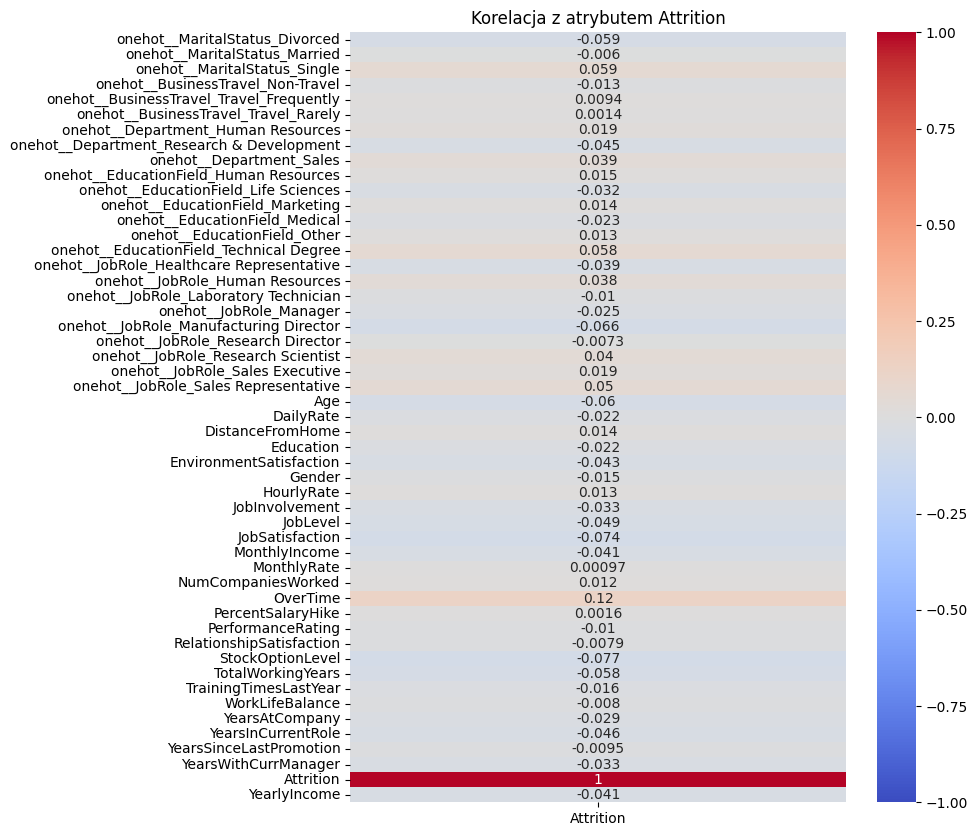

In [83]:
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_matrix[['Attrition']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelacja z atrybutem Attrition')
plt.show()

# Regresja Logistyczna

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [195]:
X = df.drop(['Attrition'],axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [197]:
model = LogisticRegression(penalty=None)
model.fit(X_train_scaled, y_train)

LogisticRegression(penalty=None)

In [198]:
y_pred = model.predict(X_test_scaled)

In [199]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_result}')

Accuracy: 0.6369426751592356
Confusion Matrix:
[[249  42]
 [129  51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       291
           1       0.55      0.28      0.37       180

    accuracy                           0.64       471
   macro avg       0.60      0.57      0.56       471
weighted avg       0.62      0.64      0.60       471



In [200]:
f1 = f1_score(y_test, y_pred)
f1

0.37362637362637363

Feature: 0, Score: -0.06658
Feature: 1, Score: 0.02121
Feature: 2, Score: 0.03672
Feature: 3, Score: -0.01655
Feature: 4, Score: 0.03069
Feature: 5, Score: -0.01450
Feature: 6, Score: -0.24591
Feature: 7, Score: 0.05460
Feature: 8, Score: 0.04955
Feature: 9, Score: 0.02573
Feature: 10, Score: -0.03581
Feature: 11, Score: 0.02047
Feature: 12, Score: -0.08101
Feature: 13, Score: 0.06307
Feature: 14, Score: 0.10106
Feature: 15, Score: -0.09034
Feature: 16, Score: 0.30748
Feature: 17, Score: -0.00941
Feature: 18, Score: -0.09924
Feature: 19, Score: -0.10905
Feature: 20, Score: -0.07260
Feature: 21, Score: 0.08342
Feature: 22, Score: -0.01755
Feature: 23, Score: 0.08276
Feature: 24, Score: -0.09122
Feature: 25, Score: -0.03659
Feature: 26, Score: 0.05785
Feature: 27, Score: -0.04918
Feature: 28, Score: -0.12663
Feature: 29, Score: -0.04827
Feature: 30, Score: 0.04099
Feature: 31, Score: -0.08890
Feature: 32, Score: 0.15920
Feature: 33, Score: -0.16524
Feature: 34, Score: -0.00209
Feature: 3

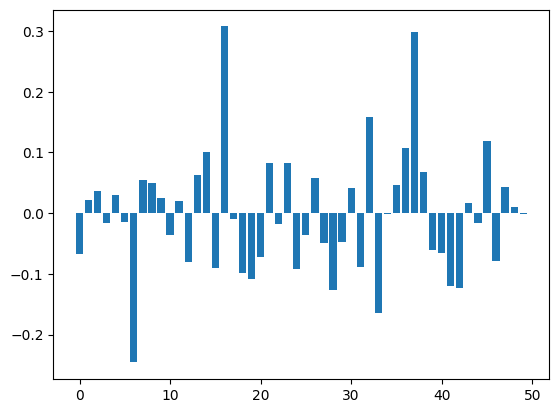

In [201]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [207]:
X.columns[importance>0.11]

Index(['onehot__JobRole_Human Resources', 'JobLevel', 'OverTime',
       'YearsAtCompany'],
      dtype='object')

#Drzewo decyzyjne

# Las losowy